In [12]:
import requests 
import pandas as pd 
import numpy as np 
import random 
import time
import sklearn
import geopandas as gpd
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import matplotlib.pyplot as plt 
import folium
import geopy
from geopy.geocoders import Nominatim


In [13]:
CLIENT_ID = 'TLVPS10MH51ZWU42GH500MWURHHCL5SBS2I5FBTCQCSQTOJX' 
CLIENT_SECRET = 'ZOF0JXHAHPB5SE0VZQQC0BXUSBBG3NBXBZ2WGKWLUF1RZYDF' 
VERSION = '20180604'
LIMIT = 30


In [14]:
address = 'Scotia Plaza, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))

The geograpical coordinates are 43.6494883, -79.37955671553408.


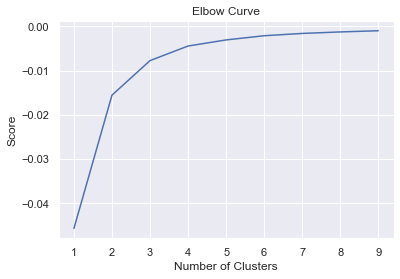

In [15]:
df = pd.read_csv('/Users/richard/Desktop/Projects/Coursera_Capstone/loc_meta.csv')

df = df.head(10000)
df.shape
df.dropna(axis=0,how='any',subset=['lats','longs'],inplace=True)

# Variable with the Longitude and Latitude
X=df.loc[:,['station_name','lats','longs']]
X.head(10)

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) 

for i in K_clusters]
Y_axis = df[['lats']]
X_axis = df[['longs']]
score = [kmeans[i].fit(Y_axis).score(Y_axis)

for i in range(len(kmeans))] 
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each pointX.head(10)

X.head(5)

X = X[['station_name','cluster_label']]
X.head(5)

clustered_data = df.merge(X, left_on='station_name', right_on='station_name')
clustered_data.head(5)
clustered_data.to_csv('clustered_data.csv')
centers = kmeans.cluster_centers_
print(centers)

[[ 43.65652617 -79.38992028]
 [ 43.64979339 -79.43584869]
 [ 43.66773225 -79.34880072]]


In [17]:
# Importing the geodesic module from the library 
from geopy.distance import geodesic 

a = (43.66602386, -79.35080819) 
b = (43.64903348, -79.43776259) 
# Print the distance calculated in km 
print(geodesic(a, b).mi) 



4.5135473758273


In [18]:
# Importing the geodesic module from the library 
from geopy.distance import geodesic 

a = (43.66602386, -79.35080819) 
b = (43.64903348, -79.43776259) 
# Print the distance calculated in km 
print(geodesic(a, b).mi) 



4.5135473758273


In [20]:
# set color scheme for the clusters

def color(cluster_label): 
    if cluster_label == 0: 
        col = 'orange'
    elif cluster_label == 1: 
        col = 'blue'
    elif cluster_label == 2: 
        col = 'red'
    else: 
        col='green'
    return col 

# create map
map_clusters = folium.Map(location=[43.6534817, -79.3839347], zoom_start=11)

for lats, longs, station_name, cluster_label in zip(clustered_data['lats'], clustered_data['longs'], clustered_data['station_name'],clustered_data['cluster_label']):
    label = '{}','{}'.format(station_name,cluster_label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lats, longs],
        radius=2,
        popup=label,
        color=color(cluster_label),
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_clusters) 
       
map_clusters

In [11]:
# Importing the geodesic module from the library 
from geopy.distance import geodesic 

a = (43.635204,	-79.468180) 
b = (43.694660,	-79.289131) 

print(geodesic(a, b).mi) 



9.867720991005834
